I pledge my Honor I have abided by the Stevens Honor system -Noah McDermott

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sklearn as sk
from sklearn import tree
import sklearn.model_selection

import graphviz

Decision trees are created using the sklearn library

In [180]:
X = []
Y = []
with open('C:/Users/Noah/Documents/Titanic.csv') as file:
    reader = csv.reader(file, delimiter = ',')
    next(reader)
    for k in reader:
        pclass = 1
        sex = 0
        if k[4] == 'female':
            sex = 1
        if k[1] == '2nd':
            pclass = 2
        if k[1] == '3rd':
            pclass = 3
        if k[5] != 'NA':
            Y.append(k[2])
            X.append([pclass, sex, k[5], k[6]])


xtrain, xtest, ytrain, ytest = sk.model_selection.train_test_split(X,Y, test_size=.3)


Two sets, known as X and Y are created.  Some modifications must be done on the data first.  "male and female" are changed to zero and one, classes are changed from '1st' to 1, and so forth.  Any data point with a null value for age is discarded.  When this is done, the test and training data are split, creating four sets.

(Note: The set may appear smaller due to some passengers being dropped for not having an age)

In [181]:
def buildtree(size=-1):
    if size != -1:
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=size)
    else:
        clf = tree.DecisionTreeClassifier()
    clf = clf.fit(xtrain, ytrain)

    predictedtrain = clf.predict(xtrain)
    traingood = 0
    trainbad = 0
    
    for p in range(len(predictedtrain)):
        if predictedtrain[p] == ytrain[p]:
            traingood += 1
        else:
            trainbad += 1

    predictedtest = clf.predict(xtest)
    testgood = 0
    testbad = 0
    
    for r in range(len(predictedtest)):
        if predictedtest[r] == ytrain[r]:
            testgood += 1
        else:
            testbad += 1

    return clf, traingood, trainbad, testgood, testbad

This is the function used to create a tree.  If a size is given, then the number of leaf nodes will be limited.  The tree which is created is compared to the actual test and training data.

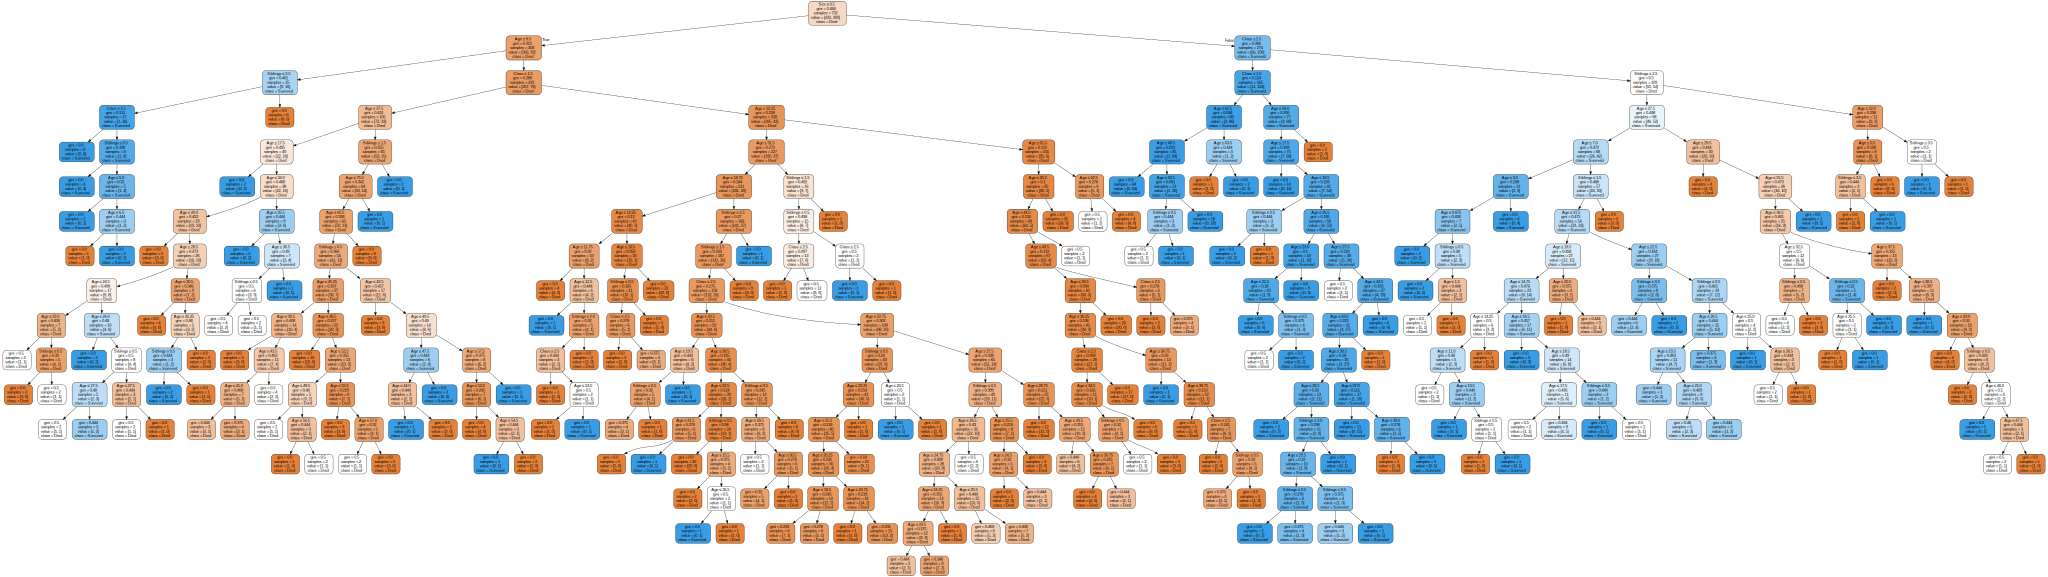

In [182]:
def plottree(builttree):
    names = ["Class", "Sex", "Age", "Siblings"]
    classnames = ["Died", "Survived"]
    dot_data = tree.export_graphviz(builttree, out_file=None, 
                          feature_names=names,  
                          class_names=classnames,  
                          filled=True, rounded=True,  
                          special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

newtree,a,b,c,d = buildtree()
plottree(newtree)

In [183]:
print("Training data correctly classified: " + str(a))
print("Training data wrongly classified: " + str(b))
print("Test data correctly classified: " + str(c))
print("Test data wrongly classified: " + str(d))

Training data correctly classified: 658
Training data wrongly classified: 74
Test data correctly classified: 164
Test data wrongly classified: 150


The initial tree created without a maximum size is huge and suffers from overfitting.  We will use cross-validation to make a smaller tree.

Optimal Size:3


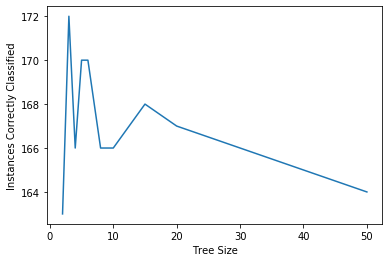

In [184]:
sizes = [2, 3,4, 5, 6, 8, 10, 15, 20, 50]
corrects = []
for s in sizes:
    corrects.append(buildtree(s)[3])
    
plt.xlabel("Tree Size")
plt.ylabel("Instances Correctly Classified")
plt.plot(sizes, corrects)

optimal = sizes[corrects.index(max(corrects))]
print("Optimal Size:"+ str(optimal))

The number of test data instances correctly classified is tested against a variety of tree sizes.  The best size is far simpler, with a tree size of 3

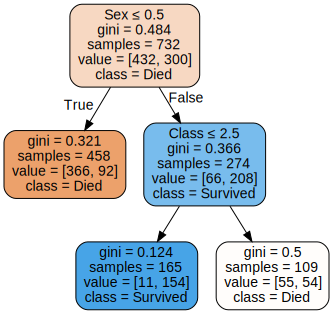

In [185]:
besttree,e,f,g,h = buildtree(optimal)
plottree(besttree)

In [168]:
print("Training data correctly classified: " + str(e))
print("Training data wrongly classified: " + str(f))
print("Test data correctly classified: " + str(g))
print("Test data wrongly classified: " + str(h))

Training data correctly classified: 721
Training data wrongly classified: 195
Test data correctly classified: 231
Test data wrongly classified: 162


The smaller tree is better at classifying the test data, while the larger one is better with the training data.  Overall, the smaller one is the better choice.